# 第7章 要約生成

## 7.2 データセット

#### 準備

In [1]:
!pip install datasets transformers[ja,torch] sentencepiece japanize-matplotlib

#### データセットのダウンロード

[NotImplementedError: Loading a dataset cached in a LocalFileSystem is not supported](https://stackoverflow.com/questions/77433096/notimplementederror-loading-a-dataset-cached-in-a-localfilesystem-is-not-suppor)

In [2]:
!pip install fsspec==2023.9.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.4/173.4 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2023.9.2 which is incompatible.


In [3]:
from datasets import load_dataset

# データセットを読み込む
dataset = load_dataset("llm-book/livedoor-news-corpus")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/823 [00:00<?, ?B/s]

livedoor-news-corpus.py:   0%|          | 0.00/3.71k [00:00<?, ?B/s]

In [4]:
# データセットの形式と事例数を確認する
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['url', 'date', 'title', 'content', 'category'],
        num_rows: 5893
    })
    validation: Dataset({
        features: ['url', 'date', 'title', 'content', 'category'],
        num_rows: 736
    })
    test: Dataset({
        features: ['url', 'date', 'title', 'content', 'category'],
        num_rows: 738
    })
})


In [5]:
from pprint import pprint

# 訓練セットの最初の二つの事例を表示する
pprint(list(dataset["train"])[:2])

[{'category': 'livedoor-homme',
  'content': '日常の何気ない気持ちをTwitterにつぶやいたり、実名登録のFacebookで懐かしい友人と再会したり、SNSはもはや我々の生活において欠かせない存在となりつつある。先日、国内の月間利用者数が1,000万人を突破し、mixi（1,520万人、2011年12月現在）を追い抜くのも時間の問題と思われるFacebookでは、診断やゲームなど様々なアプリが生まれ、ユーザーのタイムラインを今日も賑わしている。しかし、その一方で、Facebookを悪用するケースもまた徐々に増え始めている。  '
             'Facebookでは、2008年1月にAPIが公開されて以来、様々なアプリが誕生しているが、同年8月にはボット型の不正プログラム「KOOBFACE」が確認され、感染を広げた。その手口とは、「あなたがビデオに出ていますよ！」というメッセージが届き、YouTubeに偽装したURLにアクセスすると、動画再生のためにプログラムのインストールを求められ、不正プログラムをダウンロードさせるというもの。  '
             '不正プログラムには、画面に偽の感染警告を表示し、駆除のための偽セキュリティソフトを購入させ、クレジットカード情報などの個人情報を盗むものや、ブラウザでログイン時のアカウント情報を盗むものなどが存在。更に、そのユーザーのFacebookフレンド宛にも不正なメッセージを自動送信することによって、感染規模を拡大していくのだ。  '
             '2010年12月にはFacebookの公式アカウントを騙り、不正プログラムをインストールさせようとするスパムメールや、2011年1月にはアカウントの更新に必要として、個人情報を盗むフィッシングサイトを確認。その他にも、可愛らしい女性のプロフィール画像を載せた人物から好意的なメッセージが届き、携帯アドレスへの連絡を求めるスパムメッセージなど、その手口は年々多様化している。  '
             'Facebookのみならず、今年1月にはTwitter公式アカウントを騙るフィッシング詐欺サイトも確認され、昨年12月の警察庁による発表では、SNS以外にもフィッシング詐欺で約2,000万円、不正

#### データセットの分析

In [6]:
from collections import Counter

# 各カテゴリの事例数を確認する
pprint(Counter(dataset["train"]["category"]).most_common())

[('sports-watch', 731),
 ('it-life-hack', 718),
 ('dokujo-tsushin', 695),
 ('smax', 690),
 ('movie-enter', 689),
 ('peachy', 677),
 ('kaden-channel', 656),
 ('topic-news', 616),
 ('livedoor-homme', 421)]


In [7]:
categories = set() # カテゴリの集合
for data in dataset["train"]: # 訓練セットの各事例を処理する
    category, title = data["category"], data["title"]
    # すでに出現したカテゴリはスキップする
    if category not in categories:
        categories.add(category)
        print(f"{category}: {title}")

livedoor-homme: 急成長を遂げるFacebookに忍び寄る影
it-life-hack: いつでもどこでも自分専用環境！　Ubuntu起動ができるUSBメモリーを作成！【デジ通】
kaden-channel: 「PS Vita」がついに発売　—　初日は待ちわびたファンが行列を作る大盛況【話題】
smax: ソニーモバイル、Xperia ionのLTE非対応版「Xperia ion HSPA」を発表
peachy: 【終了しました】リムジンでお買い物の後はスイートルームで“うっとろりん”、お姫さまのような1日をプレゼント
movie-enter: 有言実行の男、ジュード・ロウが自信作を引っ提げ来日決定
dokujo-tsushin: 言いにくい「芸能人の○○みたいにして」の一言
sports-watch: 日本代表敗戦、セルジオ越後氏は「ベストメンバーでなければこの程度」
topic-news: 「柏木はブタ鼻」嫉妬ややっかみからAKB48で流行るイジメごっこ


tokenizer_config.json:   0%|          | 0.00/2.28k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
100%|██████████| 5893/5893 [00:10<00:00, 552.90it/s]


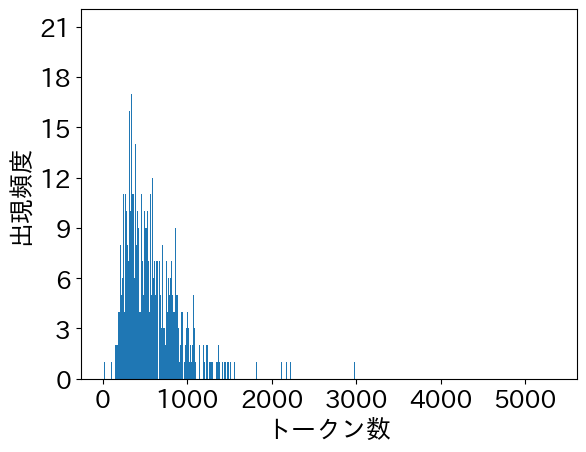

100%|██████████| 5893/5893 [00:01<00:00, 5001.88it/s]


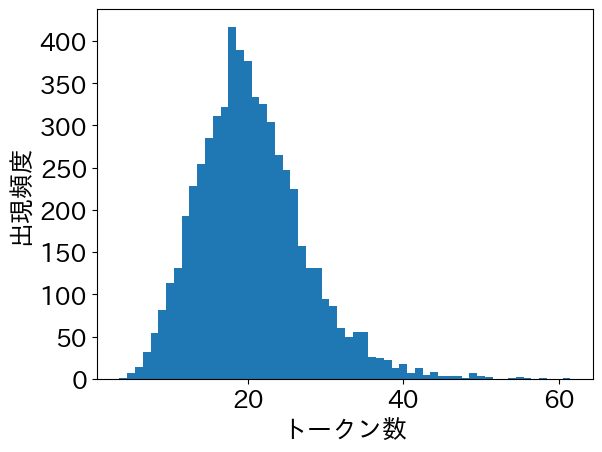

In [8]:
from collections import Counter
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from tqdm import tqdm
from transformers import AutoTokenizer, PreTrainedTokenizer
import japanize_matplotlib

# フォントサイズを18にする
plt.rcParams["font.size"] = 18

def visualize_num_tokens_distribution(
    dataset: Dataset, tokenizer: PreTrainedTokenizer, column: str
) -> None:
    """トークン数の分布を可視化"""
    # 各事例でトークン数をカウントし、トークン数ごとに結果を集約する
    counter = Counter()
    for data in tqdm(dataset):
        num_tokens = len(tokenizer.tokenize(data[column]))
        counter[num_tokens] += 1

    # トークン数の分布を可視化する
    plt.bar(counter.keys(), counter.values(), width=1.0)
    plt.xlabel("トークン数")
    plt.ylabel("出現頻度")
    plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter("%d"))
    plt.show()

# トークナイザを読み込む
model_name = "retrieva-jp/t5-base-long"
tokenizer = AutoTokenizer.from_pretrained(model_name)
# 記事のトークン数の分布を可視化する
visualize_num_tokens_distribution(
    dataset["train"], tokenizer, "content"
)
# 見出しのトークン数の分布を可視化する
visualize_num_tokens_distribution(
    dataset["train"], tokenizer, "title"
)

## 7.3 評価指標

#### 準備

In [9]:
!pip install mecab-python3 rouge-score sacrebleu bert_score

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.8/588.8 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 6.2 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=c9dce8a44386b16bb0d84fadd662a0b7301766d652ee484da7debfaba7cb62ae
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


### 7.3.1 ROUGE

#### ROUGEを算出するための実装

In [10]:
reference = "日本語T5モデルの公開"
prediction1 = "T5モデルの日本語版を公開"
prediction2 = "日本語T5をリリース"
prediction3 = "Japanese T5を発表"

In [11]:
import ipadic
import MeCab

# IPAdicを用いたMeCabを使用して、単語分割を行う
tagger = MeCab.Tagger(f"-O wakati {ipadic.MECAB_ARGS}")
ref_wakati = tagger.parse(reference).strip()
pred_wakati1 = tagger.parse(prediction1).strip()
pred_wakati2 = tagger.parse(prediction2).strip()
pred_wakati3 = tagger.parse(prediction3).strip()
print(f"参照文: {ref_wakati}")
print(f"生成文1: {pred_wakati1}")
print(f"生成文2: {pred_wakati2}")
print(f"生成文3: {pred_wakati3}")

参照文: 日本語 T 5 モデル の 公開
生成文1: T 5 モデル の 日本語 版 を 公開
生成文2: 日本語 T 5 を リリース
生成文3: Japanese T 5 を 発表


In [12]:
from collections import defaultdict
import pandas as pd
from rouge_score import rouge_scorer, scoring

# pandasの小数点以下の桁数を3に設定する
pd.options.display.precision = 3

def convert_words_to_ids(
    predictions: list[str], references: list[str]
) -> tuple[list[str], list[str]]:
    """単語列をID列に変換"""
    # 単語にユニークなIDを割り当てるためのdefaultdictを作成する
    word2id = defaultdict(lambda: len(word2id))

    # 単語区切りの文字列をID文字列に変換する
    pred_ids = [
        " ".join([str(word2id[w]) for w in p.split()])
        for p in predictions
    ]
    ref_ids = [
        " ".join([str(word2id[w]) for w in r.split()])
        for r in references
    ]
    return pred_ids, ref_ids

def compute_rouge(
    predictions: list[str], references: list[str]
) -> dict[str, dict[str, float]]:
    """ROUGEを算出"""
    # RougeScorerを設定する
    rouge = rouge_scorer.RougeScorer(
        rouge_types=["rouge1", "rouge2", "rougeL"], use_stemmer=False
    )
    aggregator = scoring.BootstrapAggregator()
    # 単語列をID列に変換する
    pred_ids, ref_ids = convert_words_to_ids(predictions, references)
    # ROUGEスコアを計算して結果を集約する
    for pred, ref in zip(pred_ids, ref_ids):
        aggregator.add_scores(rouge.score(ref, pred))
    scores = aggregator.aggregate()
    return {k: v.mid for k, v in scores.items()}

# ROUGEを算出した結果を表示する
rouge_results = {
    "生成文1": compute_rouge([pred_wakati1], [ref_wakati]),
    "生成文2": compute_rouge([pred_wakati2], [ref_wakati]),
    "生成文3": compute_rouge([pred_wakati3], [ref_wakati]),
}
df_list = [
    pd.DataFrame.from_dict(rouge_results[k], orient="index")
    for k in rouge_results.keys()
]
display(pd.concat(df_list, keys=rouge_results.keys(), axis=1).T)

rouge1  rouge2  rougeL
生成文1 precision   0.750   0.429   0.625
     recall      1.000   0.600   0.833
     fmeasure    0.857   0.500   0.714
生成文2 precision   0.600   0.500   0.600
     recall      0.500   0.400   0.500
     fmeasure    0.545   0.444   0.545
生成文3 precision   0.400   0.250   0.400
     recall      0.333   0.200   0.333
     fmeasure    0.364   0.222   0.364

### 7.3.2 BLEU

#### BLEUを算出するための実装

In [13]:
from sacrebleu import corpus_bleu

def compute_bleu(
    predictions: list[str], references: list[list[str]]
) -> dict[str, int | float | list[float]]:
    """BLUEを算出"""
    # BLUEを算出する
    result = corpus_bleu(predictions, references)
    return {
            "score": result.score,
            "counts": result.counts,
            "totals": result.totals,
            "precisions": [round(p, 2) for p in result.precisions],
            "bp": result.bp,
            "sys_len": result.sys_len,
            "ref_len": result.ref_len,
    }

# BLEUを算出した結果を表示する
bleu_results = {
    "生成文1": compute_bleu([pred_wakati1], [[ref_wakati]]),
    "生成文2": compute_bleu([pred_wakati2], [[ref_wakati]]),
    "生成文3": compute_bleu([pred_wakati3], [[ref_wakati]]),
}
df_list = [
    pd.DataFrame.from_dict(bleu_results[k], orient="index")[0]
    for k in bleu_results.keys()
]
display(pd.concat(df_list, keys=bleu_results.keys(), axis=1).T)

,score,counts,totals,precisions,bp,sys_len,ref_len
生成文1,38.26,"[6, 3, 2, 1]","[8, 7, 6, 5]","[75.0, 42.86, 33.33, 20.0]",1.0,8,6
生成文2,32.556,"[3, 2, 1, 0]","[5, 4, 3, 2]","[60.0, 50.0, 33.33, 25.0]",0.819,5,6
生成文3,17.492,"[2, 1, 0, 0]","[5, 4, 3, 2]","[40.0, 25.0, 16.67, 12.5]",0.819,5,6


### 7.3.3 BERTScore

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

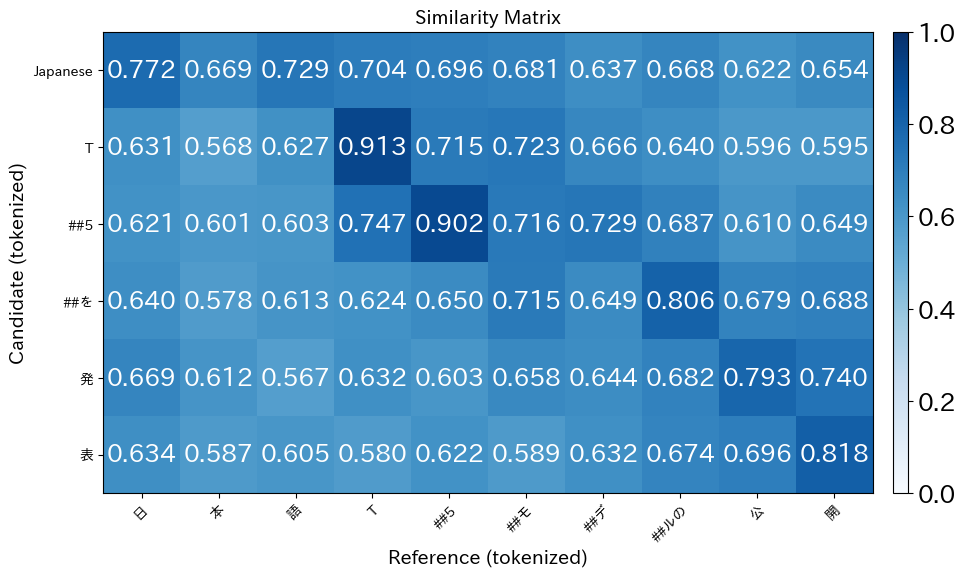

In [14]:
from bert_score import plot_example

# 生成文3と参照文の類似度行列を作成する
plot_example(prediction3, reference, lang="ja")

#### BERTScoreを算出するための実装

In [15]:
import bert_score

def compute_bertscore(
    predictions: list[str], references: list[str]
) -> dict[str, float]:
    """BERTScoreを算出"""
    # BERTScoreを計算する
    scorer = bert_score.BERTScorer(
        model_type=bert_score.utils.lang2model["ja"],
    )
    p, r, f = scorer.score(
        cands=predictions, refs=references
    )
    return {
        "precision": sum(p.tolist()) / len(p),
        "recall": sum(r.tolist()) / len(r),
        "f1": sum(f.tolist()) / len(f)
    }

# BERTScoreを算出した結果を表示する
bertscore_results = {
    "生成文1": compute_bertscore([prediction1], [reference]),
    "生成文2": compute_bertscore([prediction2], [reference]),
    "生成文3": compute_bertscore([prediction3], [reference]),
}
df_list = [
    pd.DataFrame.from_dict(bertscore_results[k], orient="index")[0]
    for k in bertscore_results.keys()
]
display(pd.concat(df_list, keys=bertscore_results.keys(), axis=1).T)

,precision,recall,f1
生成文1,0.877,0.903,0.890
生成文2,0.879,0.824,0.850
生成文3,0.834,0.785,0.809


## 7.4 見出し生成モデルの実装

### 7.4.1 T5のファインチューニング

#### データセットの前処理

In [16]:
from typing import Any
from transformers import BatchEncoding, PreTrainedTokenizer

def preprocess_data(
    data: dict[str, Any], tokenizer: PreTrainedTokenizer
) -> BatchEncoding:
    """データの前処理"""
    # 記事のトークナイゼーションを行う
    inputs = tokenizer(
        data["content"], max_length=512, truncation=True
    )
    # 見出しのトークナイゼーションを行う
    # 見出しはトークンIDのみ使用する
    inputs["labels"] = tokenizer(
        data["title"], max_length=128, truncation=True
    )["input_ids"]
    return inputs

# 訓練セットに対して前処理を行う
train_dataset = dataset["train"].map(
    preprocess_data,
    fn_kwargs={"tokenizer": tokenizer},
    remove_columns=dataset["train"].column_names,
)
# 検証セットに対して前処理を行う
validation_dataset = dataset["validation"].map(
    preprocess_data,
    fn_kwargs={"tokenizer": tokenizer},
    remove_columns=dataset["validation"].column_names,
)

Map:   0%|          | 0/5893 [00:00<?, ? examples/s]

Map:   0%|          | 0/736 [00:00<?, ? examples/s]

#### モデルのファインチューニング

In [19]:
from transformers import AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq

# モデルを読み込む
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
# collate関数にDataCollatorForSeq2Seqを用いる
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [ ]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments
from transformers.trainer_utils import set_seed

# 乱数シードを42に固定する
set_seed(42)

# Trainerに渡す引数を初期化する
training_args = Seq2SeqTrainingArguments(
    output_dir="output_t5_summarization", # 結果の保存フォルダ
    per_device_train_batch_size=8, # 訓練時のバッチサイズ
    per_device_eval_batch_size=8, # 評価時のバッチサイズ
    learning_rate=1e-4, # 学習率
    lr_scheduler_type="linear", # 学習率スケジューラ
    warmup_ratio=0.1, # 学習率のウォームアップ
    num_train_epochs=5, # 訓練エポック数
    # evaluation_strategy="epoch", # 評価タイミング
    eval_strategy="epoch", # 評価タイミング
    save_strategy="epoch", # チェックポイントの保存タイミング
    logging_strategy="epoch", # ロギングのタイミング
    load_best_model_at_end=True, # 訓練後に検証セットで最良のモデルをロード
    report_to="none",  # 外部ツールへのログを無効化
)

# Trainerを初期化する
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
    tokenizer=tokenizer,
)

# 訓練する
trainer.train()

<ipython-input-21-c070535996b8>:24: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch,Training Loss,Validation Loss


In [ ]:
from google.colab import drive

# Google ドライブをマウントする
drive.mount("drive")

In [ ]:
# 保存されたモデルをGoogleドライブのフォルダにコピーする
!mkdir -p drive/MyDrive/llm-book
!cp -r output_t5_summarization drive/MyDrive/llm-book

### 7.4.2 見出しの生成とモデルの評価

In [ ]:
# モデルを読み込む
model_name = "llm-book/t5-base-long-livedoor-news-corpus"
model = AutoModelForSeq2SeqLM.from_pretrained(model_name).to("cuda:0")
# パラメータをメモリ上に隣接した形で配置
# これを実行しない場合、モデルの保存でエラーになることがある
for param in model.parameters():
    param.data = param.data.contiguous()

#### 見出しの生成

In [ ]:
from torch.utils.data import DataLoader
from transformers import PreTrainedModel

def convert_list_dict_to_dict_list(
    list_dict: dict[str, list]
) -> list[dict[str, list]]:
    """ミニバッチのデータを事例単位のlistに変換"""
    dict_list = []
    # dictのキーのlistを作成する
    keys = list(list_dict.keys())
    for idx in range(len(list_dict[keys[0]])):  # 各事例で処理する
        # dictの各キーからデータを取り出してlistに追加する
        dict_list.append({key: list_dict[key][idx] for key in keys})
    return dict_list

def run_generation(
    dataloader: DataLoader, model: PreTrainedModel
) -> list[dict[str, Any]]:
    """見出しを生成"""
    generations = []
    for batch in tqdm(dataloader):  # 各ミニバッチを処理する
        batch = {k: v.to(model.device) for k, v in batch.items() if k != "labels"}
        # 見出しのトークンのIDを生成する
        batch["generated_title_ids"] = model.generate(**batch)
        batch = {k: v.cpu().tolist() for k, v in batch.items()}
        # ミニバッチのデータを事例単位のlistに変換する
        generations += convert_list_dict_to_dict_list(batch)
    return generations

# テストセットに対して前処理を行う
test_dataset = dataset["test"].map(
    preprocess_data,
    fn_kwargs={"tokenizer": tokenizer},
    remove_columns=dataset["test"].column_names,
)
test_dataset = test_dataset.remove_columns(["labels"])
# ミニバッチの作成にDataLoaderを用いる
test_dataloader = DataLoader(
    test_dataset,
    batch_size=8,
    shuffle=False,
    collate_fn=data_collator,
)
# 見出しを生成する
generations = run_generation(test_dataloader, model)

In [ ]:
# 生成した見出しのトークンのIDのlistをトークンのlistに変換する
tokens = tokenizer.convert_ids_to_tokens(
    generations[0]["generated_title_ids"]
)
print(tokens)

In [ ]:
def postprocess_title(
    generations: list[dict[str, Any]],
    dataset: list[dict[str, Any]],
    tokenizer: PreTrainedTokenizer,
):
    """見出しの後処理"""
    results = []
    # 各事例を処理する
    for generation, data in zip(generations, dataset):
        # IDのlistをテキストに変換する
        data["generated_title"] = tokenizer.decode(
            generation["generated_title_ids"],
            skip_special_tokens=True,
        )
        results.append(data)
    return results

# 見出しテキストを生成する
results = postprocess_title(generations, dataset["test"], tokenizer)
print(results[0]["generated_title"])

#### モデルの評価

In [ ]:
# ROUGEを算出して表示する
generated_titles = [
    tagger.parse(r["generated_title"]).strip() for r in results
]
ref_titles = [tagger.parse(r["title"]).strip() for r in results]
rouge_results = compute_rouge(generated_titles, ref_titles)
display(pd.DataFrame.from_dict(rouge_results, orient="index"))

In [ ]:
# BLEUを算出して表示する
generated_titles = [
    tagger.parse(r["generated_title"]).strip() for r in results
]
ref_titles = [[tagger.parse(r["title"]).strip() for r in results]]
bleu_results = compute_bleu(generated_titles, ref_titles)
display(pd.DataFrame([bleu_results]).rename(index={0: "BLEU"}).T)

In [ ]:
# BERTScoreを算出して表示する
generated_titles = [r["generated_title"].strip() for r in results]
ref_titles = [r["title"].strip() for r in results]
bertscore_results = compute_bertscore(generated_titles, ref_titles)
display(
    pd.DataFrame([bertscore_results]).rename(index={0: "BERTScore"})
)

In [ ]:
# DataFrameのセル内の最大出力文字数を指定する
pd.options.display.max_colwidth = 500
# 記事、見出し、生成した見出しを表示する
display(
    pd.DataFrame(results)[:3][["content", "title", "generated_title"]]
)

## 7.5 多様な生成方法による見出し生成

In [ ]:
content = dataset["test"][434]["content"]
title = dataset["test"][434]["title"]
print(f"記事: {content}")
print(f"見出し: {title}")

In [ ]:
from functools import partial
from transformers import pipeline

# 乱数シードを42に再設定する
set_seed(42)

# モデルを固定したpipelineを作成する
fixed_model_pipeline = partial(
    pipeline,
    "summarization",
    model=model,
    tokenizer=tokenizer,
    device="cuda:0",
)

### 7.5.1 テキスト生成における探索アルゴリズム

#### 貪欲法

In [ ]:
print(fixed_model_pipeline()(content)[0]["summary_text"])

In [ ]:
summarization_pipeline = fixed_model_pipeline(no_repeat_ngram_size=2)
print(summarization_pipeline(content)[0]["summary_text"])

#### ビームサーチ

In [ ]:
summarization_pipeline = fixed_model_pipeline(num_beams=3)
print(summarization_pipeline(content)[0]["summary_text"])

In [ ]:
summarization_pipeline = fixed_model_pipeline(
    num_beams=3, num_return_sequences=3
)
for summary in summarization_pipeline(content):
    print(summary["summary_text"])

### 7.5.2 サンプリングを用いたテキスト生成

In [ ]:
summarization_pipeline = fixed_model_pipeline(do_sample=True, top_k=0)
print(summarization_pipeline(content)[0]["summary_text"])

In [ ]:
summarization_pipeline = fixed_model_pipeline(
    do_sample=True, top_k=0, temperature=0.5
)
print(summarization_pipeline(content)[0]["summary_text"])

In [ ]:
summarization_pipeline = fixed_model_pipeline(
    do_sample=True, top_k=0, temperature=1.3
)
print(summarization_pipeline(content)[0]["summary_text"])

#### top-kサンプリング

In [ ]:
summarization_pipeline = fixed_model_pipeline(
    do_sample=True, top_k=10, temperature=1.3
)
print(summarization_pipeline(content)[0]["summary_text"])

#### top-pサンプリング

In [ ]:
summarization_pipeline = fixed_model_pipeline(
    do_sample=True, top_k=0, top_p=0.5, temperature=1.3
)
print(summarization_pipeline(content)[0]["summary_text"])

### 7.5.3 長さを調整したテキスト生成

In [ ]:
summarization_pipeline = fixed_model_pipeline(
    num_beams=3,
    num_return_sequences=3,
    min_new_tokens=5,
    max_new_tokens=5,
)
for summary in summarization_pipeline(content):
    print(summary["summary_text"])

In [ ]:
summarization_pipeline = fixed_model_pipeline(
    num_beams=3,
    num_return_sequences=3,
    min_new_tokens=35,
    max_new_tokens=35,
)
for summary in summarization_pipeline(content):
    print(summary["summary_text"])

In [ ]:
summarization_pipeline = fixed_model_pipeline(
    num_beams=3,
    num_return_sequences=3,
    min_new_tokens=35,
    max_new_tokens=35,
    do_sample=True,
    temperature=1.3,
    no_repeat_ngram_size=3,
)
for summary in summarization_pipeline(content):
    print(summary["summary_text"])